## 6장 3절 다중 회귀(Multiple Regression)

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [2]:
diabates = load_diabetes()
diabates

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
x = pd.DataFrame(data=diabates.data, columns = diabates.feature_names)
y = diabates.target

In [4]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [5]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### ① Ridge

In [25]:
from sklearn.linear_model import Ridge
import numpy as np

alpha = np.logspace(-3, 1, 5)

data=[]
for i, a in enumerate(alpha):
#     print(i, a)
    ridge = Ridge(alpha=a)
    ridge.fit(x, y)
#     print(ridge.coef_, type(ridge.coef_))
    data.append(pd.Series(np.hstack([ridge.coef_])))
    
# print(data, type(data))
df_ridge = pd.DataFrame(data = data, index = alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


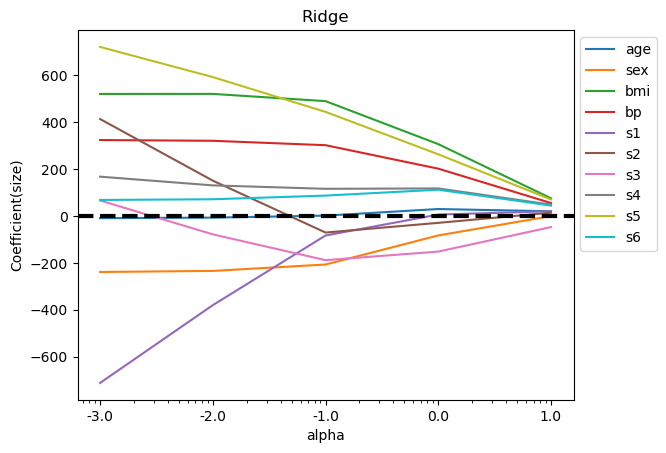

In [17]:
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient(size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

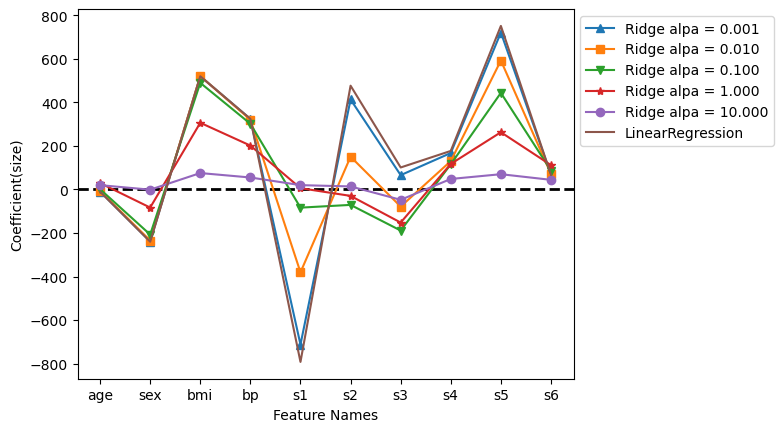

In [29]:
plt.axhline(y=0, linestyle="--", color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label='Ridge alpa = 0.001')
plt.plot(df_ridge.loc[0.010], 's-', label='Ridge alpa = 0.010')
plt.plot(df_ridge.loc[0.100], 'v-', label='Ridge alpa = 0.100')
plt.plot(df_ridge.loc[1.000], '*-', label='Ridge alpa = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label='Ridge alpa = 10.000')

plt.plot(lr.coef_, label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient(size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### ② Lasso

In [30]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)

data = []
for i,a in enumerate(alpha):
    lasso = Lasso(alpha=a)
    lasso.fit(x,y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data = data, index=alpha)
df_lasso.columns = x.columns
df_lasso
    

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


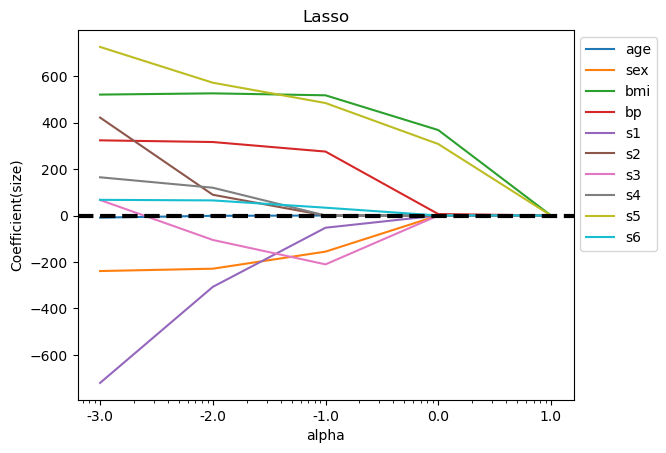

In [33]:
plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1,1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient(size)')
plt.axhline(y=0, linestyle="--", color="black", linewidth=3)
plt.show()

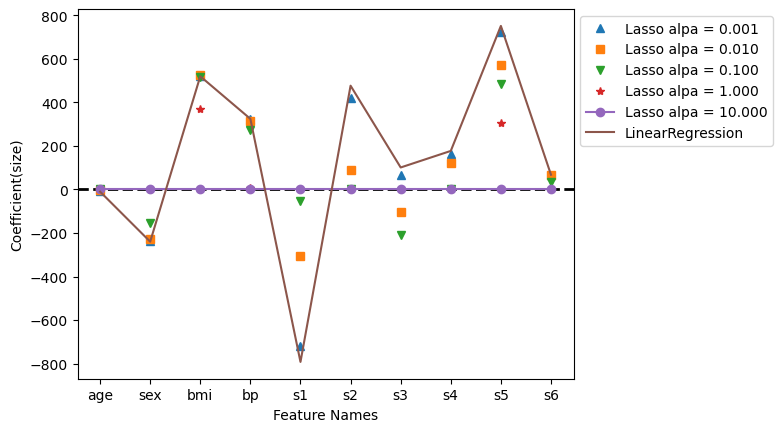

In [34]:
plt.axhline(y=0, linestyle="--", color='black', linewidth=2)
plt.plot(df_lasso.loc[0.001], '^', label='Lasso alpa = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label='Lasso alpa = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Lasso alpa = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Lasso alpa = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Lasso alpa = 10.000')

plt.plot(lr.coef_, label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient(size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### ③ Elastic Net

In [35]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

data=[]
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha = a, l1_ratio=0.5)
    ela.fit(x,y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data = data, index=alpha)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


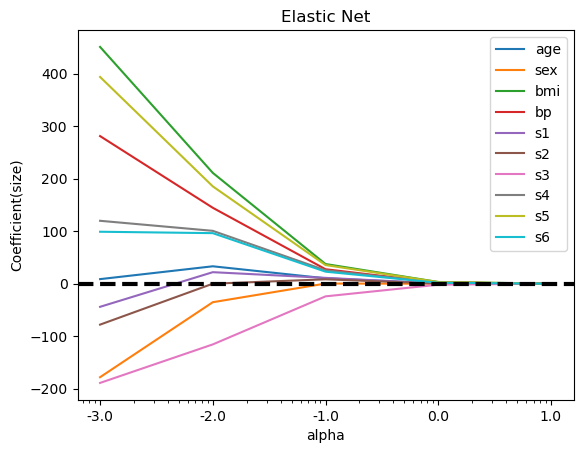

In [36]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1,1))
plt.title("Elastic Net")
plt.xlabel('alpha')
plt.ylabel('Coefficient(size)')
plt.axhline(y=0, linestyle="--", color='black', linewidth =3)
plt.show()

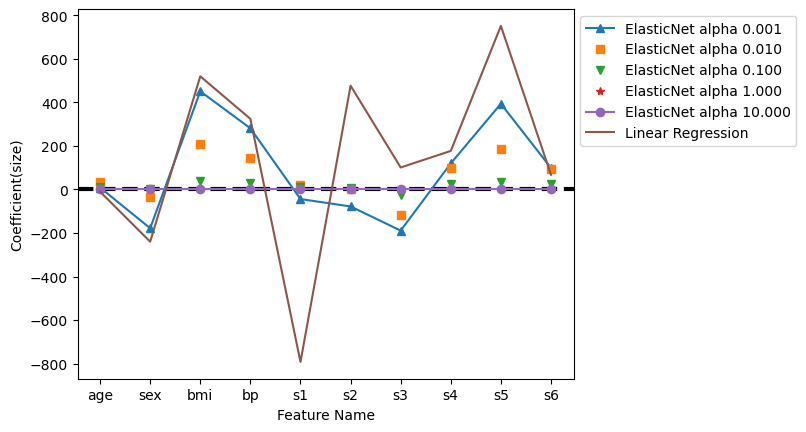

In [40]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.plot(df_ela.loc[0.001], '^-', label='ElasticNet alpha 0.001')
plt.plot(df_ela.loc[0.010], 's', label='ElasticNet alpha 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='ElasticNet alpha 0.100')
plt.plot(df_ela.loc[1.000], '*', label='ElasticNet alpha 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='ElasticNet alpha 10.000')

plt.plot(lr.coef_, label = 'Linear Regression')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Feature Name')
plt.ylabel('Coefficient(size)')
plt.show()
